<a href="https://colab.research.google.com/github/novianaramadhani/DataMining/blob/main/006_Noviana_Ramadhani_Regresi_Logistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama : Noviana Ramadhani
### Nim  : 2109116006

###Dataset Telco Customer Churn: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


#Businness Understanding

Dataset "Telco Customer Churn" adalah kumpulan data yang berisi informasi tentang pelanggan perusahaan telekomunikasi fiktif. Data ini mencakup berbagai atribut tentang pelanggan, seperti jenis layanan yang digunakan, lama waktu berlangganan, biaya bulanan, metode pembayaran, dan sebagainya. 

✅🎀Tujuan dari dataset ini adalah untuk mempelajari perilaku pelanggan dalam industri telekomunikasi dan memprediksi apakah pelanggan akan tetap menjadi pelanggan atau berhenti berlangganan layanan dari perusahaan.



1.	customerID: ID pelanggan
2.	gender: jenis kelamin pelanggan
3.	SeniorCitizen: menunjukkan apakah pelanggan adalah warga lanjut usia atau tidak
4.	Partner: menunjukkan apakah pelanggan memiliki pasangan atau tidak
5.	Dependents: menunjukkan apakah pelanggan memiliki tanggungan atau tidak
6.	tenure: menunjukkan lama waktu berlangganan pelanggan dalam bulan
7.	PhoneService: menunjukkan apakah pelanggan menggunakan layanan telepon atau tidak
8.	MultipleLines: menunjukkan apakah pelanggan menggunakan lebih dari satu saluran telepon atau tidak
9.	InternetService: menunjukkan jenis layanan internet yang digunakan pelanggan (DSL, Fiber optic, atau tidak ada)
10.	OnlineSecurity: menunjukkan apakah pelanggan menggunakan layanan keamanan online atau tidak
11.	OnlineBackup: menunjukkan apakah pelanggan menggunakan layanan backup online atau tidak
12.	DeviceProtection: menunjukkan apakah pelanggan menggunakan layanan perlindungan perangkat atau tidak
13.	TechSupport: menunjukkan apakah pelanggan menggunakan layanan dukungan teknis atau tidak
14.	StreamingTV: menunjukkan apakah pelanggan menggunakan layanan TV streaming atau tidak
15.	StreamingMovies: menunjukkan apakah pelanggan menggunakan layanan film streaming atau tidak
16.	Contract: menunjukkan jenis kontrak berlangganan pelanggan (month-to-month, one year, atau two year)
17.	PaperlessBilling: menunjukkan apakah pelanggan menggunakan sistem tagihan online atau tidak
18.	PaymentMethod: menunjukkan metode pembayaran pelanggan (Electronic check, Mailed check, Bank transfer (automatic), atau Credit card (automatic))
19.	MonthlyCharges: menunjukkan biaya bulanan pelanggan
20.	TotalCharges: menunjukkan total biaya yang dibayarkan pelanggan selama berlangganan
21.	Churn: apakah pelanggan sudah berhenti atau belum menjadi pelanggan perusahaan, dapat bernilai "Yes" (ya) atau "No" (tidak)



#Data Understanding

In [ ]:
#Import Library
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

dataset_path = '/content/drive/MyDrive/dataset/telco.csv'
df = pd.read_csv(dataset_path)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# Mengambil 30% data secara acak
df_sample = df.sample(frac=0.3, random_state=42)

# Menampilkan data sample
print(df_sample)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
185   1024-GUALD  Female              0     Yes         No       1   
2715  0484-JPBRU    Male              0      No         No      41   
3825  3620-EHIMZ  Female              0     Yes        Yes      52   
1807  6910-HADCM  Female              0      No         No       1   
132   8587-XYZSF    Male              0      No         No      67   
...          ...     ...            ...     ...        ...     ...   
5522  2619-WFQWU  Female              0      No         No       1   
6377  7851-FLGGQ    Male              0      No         No       1   
5500  7139-JZFVG    Male              0     Yes        Yes      60   
2392  3771-PZOBW    Male              0      No         No      20   
6705  3733-ZEECP    Male              0     Yes        Yes      22   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
185            No  No phone service             DSL                   No  ... 

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 185 to 6705
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2113 non-null   object 
 1   gender            2113 non-null   object 
 2   SeniorCitizen     2113 non-null   int64  
 3   Partner           2113 non-null   object 
 4   Dependents        2113 non-null   object 
 5   tenure            2113 non-null   int64  
 6   PhoneService      2113 non-null   object 
 7   MultipleLines     2113 non-null   object 
 8   InternetService   2113 non-null   object 
 9   OnlineSecurity    2113 non-null   object 
 10  OnlineBackup      2113 non-null   object 
 11  DeviceProtection  2113 non-null   object 
 12  TechSupport       2113 non-null   object 
 13  StreamingTV       2113 non-null   object 
 14  StreamingMovies   2113 non-null   object 
 15  Contract          2113 non-null   object 
 16  PaperlessBilling  2113 non-null   object

###Eksplorating data

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

<Axes: xlabel='MultipleLines', ylabel='Count'>

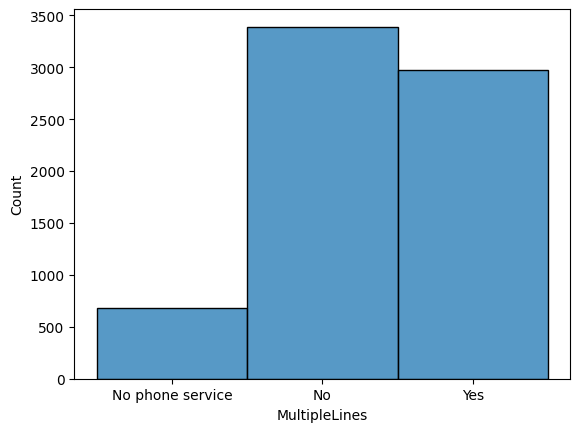

In [ ]:
#Menampilkan distribusi data MultipleLines
sns.histplot(data=df, x='MultipleLines')

<ipython-input-62-72583a950824>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

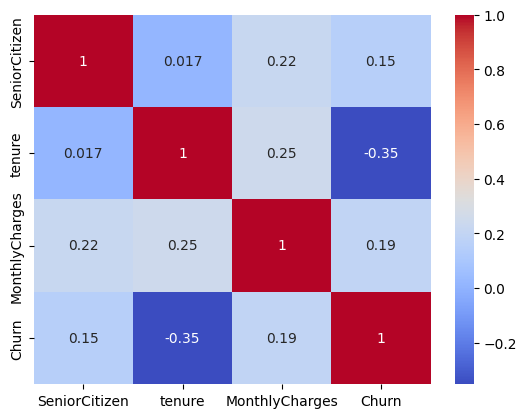

In [ ]:
#Korelasi antara variabel satu dengan variabel lain
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='coolwarm', annot=True)

#Data Preparation

In [ ]:
# Cek missing values
print(df_sample.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
#Menghapus Data Kosong / prepocessing data
df1 = df_sample.dropna() 
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,2619-WFQWU,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes
6377,7851-FLGGQ,Male,0,No,No,1,No,No phone service,DSL,No,...,No,Yes,No,Yes,Month-to-month,Yes,Mailed check,44.65,44.65,Yes
5500,7139-JZFVG,Male,0,Yes,Yes,60,Yes,No,DSL,Yes,...,Yes,No,No,No,Two year,No,Bank transfer (automatic),60.50,3694.45,No
2392,3771-PZOBW,Male,0,No,No,20,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),90.70,1781.35,No


In [ ]:
df1.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2113.000000,2113.000000,2113.000000
mean,0.166588,32.223852,64.683696
std,0.372696,24.751426,29.977223
min,0.000000,0.000000,18.700000
25%,0.000000,8.000000,35.700000
50%,0.000000,28.000000,70.200000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [ ]:
#Melihat data duplikat
duplikat =df1.duplicated()
print(df1[duplikat])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [ ]:
# Memilih variabel
selected_vars = ["tenure", "MonthlyCharges", "TotalCharges", "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

df1 = df1[selected_vars]

In [ ]:
# Menghapus data yang hilang atau kosong
df1 = df1.dropna()

In [ ]:
# Menampilkan data setelah dihapus nilai yang tidak valid
print(df1.head())

      tenure  MonthlyCharges TotalCharges  gender  SeniorCitizen Partner  \
185        1           24.80         24.8  Female              0     Yes   
2715      41           25.25       996.45    Male              0      No   
3825      52           19.35       1031.7  Female              0     Yes   
1807       1           76.35        76.35  Female              0      No   
132       67           50.55       3260.1    Male              0      No   

     Dependents PhoneService     MultipleLines InternetService  \
185          No           No  No phone service             DSL   
2715         No          Yes               Yes              No   
3825        Yes          Yes                No              No   
1807         No          Yes                No     Fiber optic   
132          No          Yes                No             DSL   

           OnlineSecurity         OnlineBackup     DeviceProtection  \
185                    No                   No                   No   
2715

In [ ]:
import numpy as np
import pandas as pd

# Mengganti nilai kosong dengan NaN
df1 = df1.replace(' ', np.nan)

# Mengisi nilai NaN dengan rata-rata kolom
df1.fillna(df1.mean(numeric_only=True), inplace=True)

In [ ]:
print(df1.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Menormalisasi variabel numerik
scaler = StandardScaler()
df1[df1.columns[0:3]] = scaler.fit_transform(df1[df1.columns[0:3]])

In [ ]:
# Membersihkan data dari nilai kosong pada kolom target 'Churn'
df1 = df1.dropna(subset=['Churn'])
df1

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
185,-1.264275,-1.329935,-0.987417,Female,0,Yes,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
2715,0.352979,-1.314930,-0.559229,Male,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),No
3825,0.797724,-1.511661,-0.543695,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No
1807,-1.264275,0.388961,-0.964700,Female,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,Yes
132,1.404194,-0.471321,0.438318,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,-1.264275,0.182226,-0.967432,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
6377,-1.264275,-0.668052,-0.978669,Male,0,No,No,No,No phone service,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Mailed check,Yes
5500,1.121175,-0.139546,0.629728,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Bank transfer (automatic),No
2392,-0.496079,0.867451,-0.213339,Male,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No


In [ ]:
df1 = pd.get_dummies(df1)

#Modelling


In [ ]:
# Mengimpor library
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



# Memisahkan variabel dependen dan independen
X = df1.drop("Churn", axis=1)
y = df1["Churn"]

# Mengisi nilai kosong dengan nilai rata-rata
X = X.fillna(X.mean())

# Mengubah tipe data kolom tertentu
df1["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membangun model regresi logistik
model = LogisticRegression()
model.fit(X_train, y_train)

# Memprediksi nilai target pada data uji
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menggunakan model untuk memprediksi data test
y_pred = model.predict(X_test)

# Menghitung precision, recall, dan f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.62
Recall: 0.5391304347826087
F1-score: 0.5767441860465116


Penjelasan Output

⭐🎀Precision (presisi) mengukur sejauh mana hasil positif yang diberikan oleh model benar. Precision dihitung dengan membagi jumlah true positive (TP) dengan jumlah keseluruhan hasil yang diklasifikasikan sebagai positif (true positive ditambah false positive). 
*   Ini berarti sekitar 62% dari prediksi positif yang dilakukan oleh model adalah benar, sedangkan sisanya 38% adalah false positive.

🍉🐧Recall (ingatan) mengukur sejauh mana model dapat mengidentifikasi keseluruhan data positif yang ada. Recall dihitung dengan membagi jumlah true positive (TP) dengan jumlah keseluruhan data yang sebenarnya positif (true positive ditambah false negative).
*   Dalam konteks output yang diberikan, nilai recall adalah 0.539. Ini berarti model berhasil menemukan sekitar 53.9% dari semua kasus positif yang ada.

✅🐳F1-score adalah ukuran kombinasi dari precision dan recall yang memberikan nilai rata-rata harmonik antara keduanya. F1-score dihitung dengan menggunakan rumus: 2 * (precision * recall) / (precision + recall).
*   Dalam konteks output yang diberikan, nilai F1-score adalah 0.577. Ini menunjukkan keseimbangan antara precision dan recall dalam model klasifikasi tersebut.







Akurasi model pada data uji: 78.44%


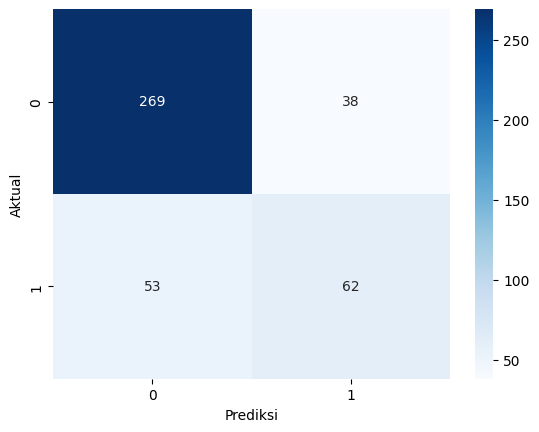

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# menghitung akurasi model pada data uji
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model pada data uji: {:.2f}%".format(accuracy * 100))

# menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()